# Setup
Let’s start by importing the necessary libraries

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from IPython import display
from IPython.display import Image
import ipywidgets as widgets
import threading
import time

# Display the webcam in OpenCV’s own window
To start, here’s the standard way of displaying the webcam feed with OpenCV. It will open a separate window.

In [13]:
# Stop button
# ================
stopButton = widgets.ToggleButton(
    value=False,
    description='Stop',
    disabled=False,
    button_style='danger', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='square' # (FontAwesome names without the `fa-` prefix)
)

def crop_image(result, image):
    assert result == True
    # print (result, image.shape)
    image_cropped = image[:,int(image.shape[1]/2-image.shape[0]/2) : int(image.shape[1]/2+image.shape[0]/2)]
    # print (image_cropped.shape)
    return image_cropped

def convert_to_mnist(image):
    shape = image.shape # need to convert it to 28 x 28 x 255
    resized_image = cv2.resize(image, (28, 28)) 
    gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    print(gray.shape)
    print (gray)
    return resized_image

# Display function
# ================
def view(button):
    cap = cv2.VideoCapture(0)
    display_handle=display.display(None, display_id=True)
    i = 0

    while True:
        try:
            result, frame = cap.read()
            cropped_frame = crop_image(result, frame)
            mnist_format = convert_to_mnist(cropped_frame)
            frame = cv2.flip(mnist_format, 1) # if your camera reverses your image
            _, frame = cv2.imencode('.jpeg', cropped_frame)         #converts (encodes) image formats into streaming data and stores it in-memory cache
            display.display(stopButton)
            display.display(Image(data=frame.tobytes()))
            print("label")
            display.clear_output(wait=True)
            time.sleep(1.0)
            if stopButton.value==True:
                cap.release()
                display_handle.update(None)
                break
        except KeyboardInterrupt:
            cap.release()
            display_handle.update(None)
            break
  

None

(28, 28)
[[  2   2   4   4   3   4   5   5   4   5   4   3   4   3   2   2   1   1
    1   2   1   0   1   1   0   0   0   0]
 [  5   4   4   5   5   6   7   6   6   6   5   6   5   3   4   2   2   1
    1   1   2   1   1   0   0   0   0   0]
 [  6   5   6   5   6   6   7   9   8   7   5   7   5   4   4   4   3   4
    3   1   1   1   1   1   0   0   0   0]
 [  6   7   7   6   6   8  10  10  10   9   7   6   6   5   5   5   5   5
    4   2   2   2   1   1   1   1   0   0]
 [  6   7   9   8   7   7  10  10  10  10   9   8   7   7   7   6   6   5
    5   4   4   2   1   1   1   1   1   0]
 [  9   9  10  10   9   9  10  13  13   9  12  11   9   9   8   9   6   6
    5   4   4   2   2   2   1   1   1   1]
 [  9  11  10  10  11  10  11  11  13  11  13  12  12  10  10   9   8   6
    6   5   4   3   3   2   2   1   1   0]
 [  9  10  11   9  10  11  13  11   9  10  14  11  13  11  11   9   8   8
    7   5   6   3   3   2   1   1   0   0]
 [ 10  10  10  12  10   9  11  15   9   9  13  12  11  

ToggleButton(value=True, button_style='danger', description='Stop', icon='square', tooltip='Description')

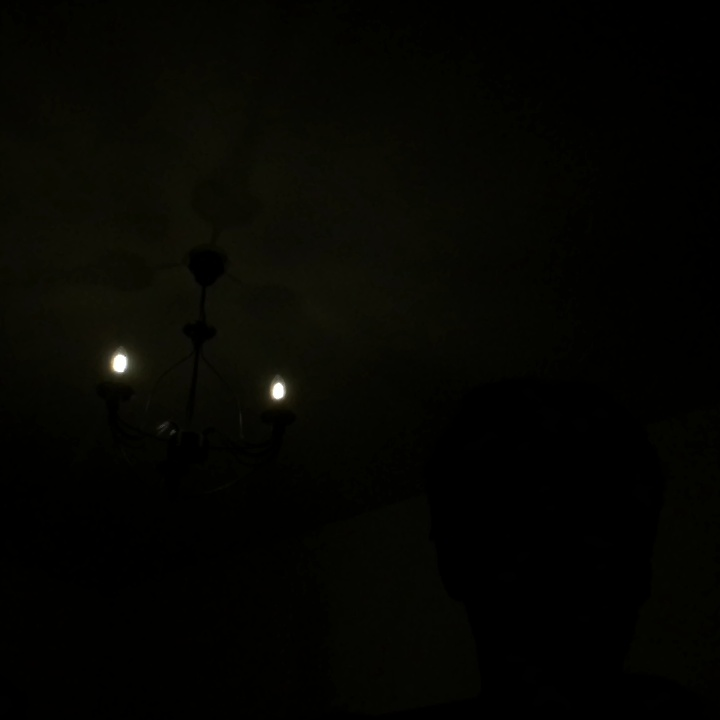

label


In [ ]:
# Run
# ================
# display.display(stopButton)
thread = threading.Thread(target=view, args=(stopButton,))
thread.start()